## 라이브러리 호출

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic') 
plt.rcParams['axes.unicode_minus'] = False 
from matplotlib import font_manager
# 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  
font_prop = font_manager.FontProperties(fname=font_path)
import json
from konlpy.tag import Okt
from collections import Counter
import itertools


In [2]:
# json 불러오기
file_path = "../chunker/sonata_Owner's_Manual_pdfminer_chunks.json"
data = []

with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

sonata = pd.DataFrame(data)

# 결과 확인
print(sonata.head())


                                                text      type source_pages  \
0                                DN8_KO.book  Page 1                    [1]   
1  안 전 및 차 량 손 상 경 고\n본 취 급 설 명 서 에 는 고 객 및 차 량 의...     title          [1]   
2                                    선 택  또 는  미 장 착  subtitle          [1]   
3  사 양 표 시\n고 객 님 의  차 량 에  장 착 되 지  않 는  사 양 에  ...  subtitle       [1, 2]   
4                                    내 용 찾 기 방 법 설 명     title          [2]   

  model  
0   소나타  
1   소나타  
2   소나타  
3   소나타  
4   소나타  


In [3]:
# 전체 행/열 수와 결측치 등 기본 정보
sonata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          479 non-null    object
 1   type          479 non-null    object
 2   source_pages  479 non-null    object
 3   model         479 non-null    object
dtypes: object(4)
memory usage: 15.1+ KB


In [4]:
print(sonata['type'].value_counts())
print("-"*50)
print(sonata['source_pages'].value_counts())
print("-"*50)
print(sonata['model'].value_counts())
print("-"*50)


type
title       271
subtitle    207
              1
Name: count, dtype: int64
--------------------------------------------------
source_pages
[5]             11
[33]             9
[35]             8
[3]              5
[500]            5
                ..
[43, 44, 45]     1
[45, 46, 47]     1
[48, 49, 47]     1
[49, 50, 51]     1
[11, 12, 13]     1
Name: count, Length: 407, dtype: int64
--------------------------------------------------
model
소나타    479
Name: count, dtype: int64
--------------------------------------------------


## 빈도기반 분석

In [5]:
from konlpy.tag import Okt
from collections import Counter
import itertools

# 1. Okt 형태소 분석기 초기화
okt = Okt()

# 2. 텍스트 데이터
sonata_texts = sonata['text'].tolist()

# 3. 각 문장을 형태소 분석하여 단어 단위로 나누기
sonata_tokenized = [okt.nouns(text) for text in sonata_texts]  # 명사 추출

# 불용어 처리 
stopwords = ['수', '를', '고', '이', '경', '주', '중', '시오', '의', '후', '시', '수', 
             '등', '때', '및', '경우','로']

# 4. 불용어 제거
sonata_filtered_tokens = [
    [word for word in sentence if word not in stopwords] for sentence in sonata_tokenized
]

# 5. 단어 빈도 집계 (불용어 제거 후 단어 리스트 사용)
sonata_flat_tokens = list(itertools.chain.from_iterable(sonata_filtered_tokens))  # 리스트 평탄화
sonata_word_freq = Counter(sonata_flat_tokens)


# 6. 상위 50개 단어 출력
sonata_top_n = 50
sonata_top_words = sonata_word_freq.most_common(sonata_top_n)

# 출력
for word, freq in sonata_top_words:
    print(f'{word}: {freq}')



차량: 1491
작동: 1243
상태: 1043
주행: 905
보조: 862
시동: 859
표시: 788
기능: 662
사용: 618
버튼: 606
설정: 566
경고: 539
주차: 535
브레이크: 532
도어: 517
전방: 502
시스템: 495
키: 475
점검: 472
속도: 465
자동: 455
타이어: 446
장치: 445
충돌: 436
스마트: 434
차: 433
엔진: 423
방지: 419
변속: 406
해제: 403
운전: 401
좌석: 384
센서: 377
주의: 361
확인: 356
이상: 355
페달: 351
운전자: 344
조절: 343
안전: 336
석: 318
고등: 313
위치: 311
클러스터: 298
에어백: 283
오: 274
인식: 274
습: 268
선택: 267
후방: 255


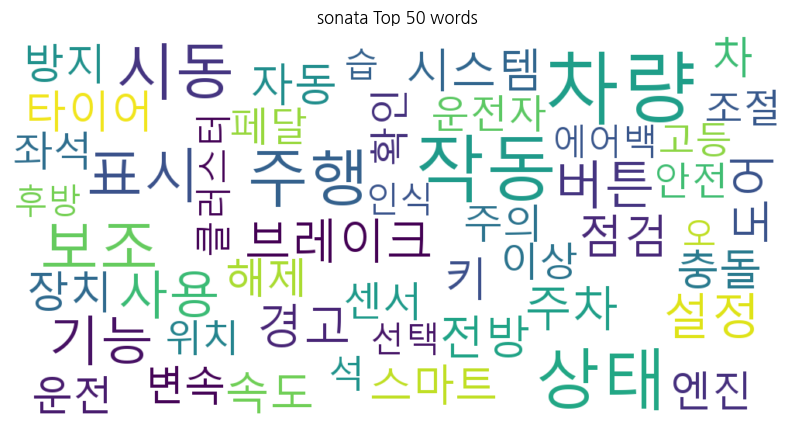

In [6]:
from wordcloud import WordCloud
# 1. top_words를 dict 형태로 변환
sonata_top_words_dict = dict(sonata_top_words)

# 2. 워드 클라우드 시각화
sonata_wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      font_path='C:/Windows/Fonts/malgun.ttf', 
                      max_font_size=100,  # 글자 크기 제한
                      min_font_size=20,   # 최소 글자 크기
                      prefer_horizontal=0.9).generate_from_frequencies(sonata_top_words_dict)

# 3. 시각화 출력
plt.figure(figsize=(10, 6))
plt.imshow(sonata_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("sonata Top 50 words")
plt.show()

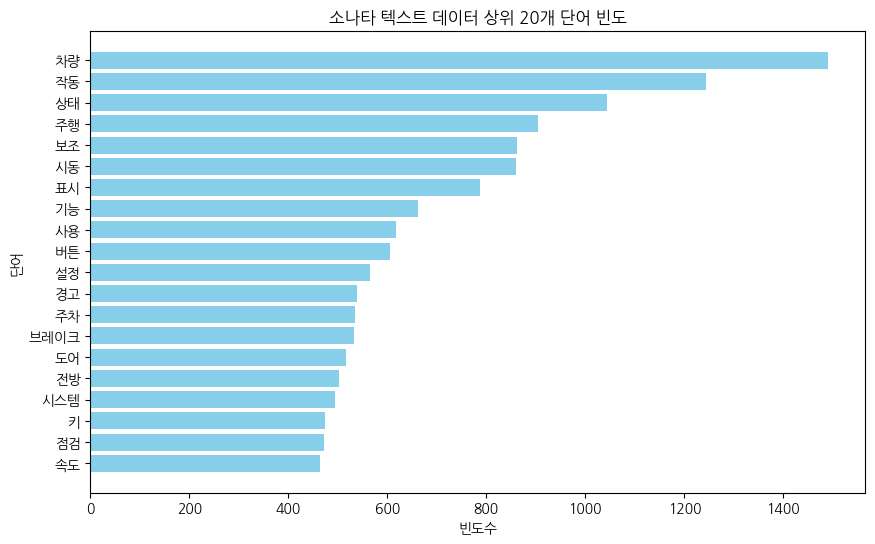

In [7]:
sonata_top_words2 = sonata_word_freq.most_common(20)
sonata_top_words_dict2 = dict(sonata_top_words2)
sonata_words, sonata_counts = zip(*sonata_top_words2)# 단어와 빈도를 분리

plt.figure(figsize=(10, 6))
plt.barh(sonata_words, sonata_counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('소나타 텍스트 데이터 상위 20개 단어 빈도')
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 설정
plt.show()

## TF-IDF 기반 분석

차량: 25.0310
보조: 21.8127
작동: 18.8425
주행: 17.4048
상태: 15.5844
시동: 15.4861
전방: 15.2970
표시: 15.1080
엔진: 14.0627
브레이크: 14.0319
설정: 13.8064
점검: 13.4557
스마트: 13.2275
타이어: 13.2095
주차: 13.1900
경고: 12.7619
충돌: 12.5285
버튼: 12.4254
도어: 12.0572
기능: 11.9881
시스템: 11.9379
사용: 11.6044
변속: 11.3056
속도: 11.2404
방지: 10.7418
페달: 10.1899
자동: 10.1223
좌석: 10.0237
트렁크: 9.9494
주의: 9.5614
조절: 9.4881
후방: 9.4612
센서: 9.2387
운전: 9.2275
장치: 9.1156
클러스터: 9.0239
인식: 8.6122
에어백: 8.4928
제한: 8.4822
해제: 8.2355
차로: 8.0235
사항: 7.9332
컨트롤: 7.5765
확인: 7.4440
안전: 7.4296
모드: 7.3417
스위치: 7.1780
선택: 7.1729
운전자: 7.1677
측방: 7.0548


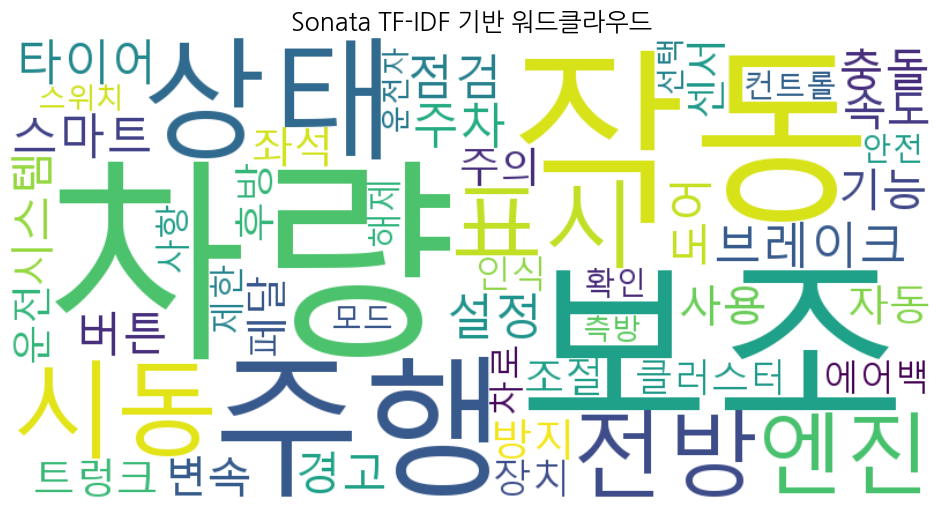

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서별로 띄어쓰기 기준으로 연결
sonata_docs = [' '.join(tokens) for tokens in sonata_filtered_tokens]

# 2. TF-IDF 벡터화
sonata_vectorizer = TfidfVectorizer()
sonata_X = sonata_vectorizer.fit_transform(sonata_docs)

# 3. 단어와 점수 추출
sonata_words = sonata_vectorizer.get_feature_names_out()
sonata_scores = sonata_X.sum(axis=0).A1  # 각 단어의 TF-IDF 점수 합계
sonata_word_scores = dict(zip(sonata_words, sonata_scores))

sonata_top_50 = sorted(sonata_word_scores.items(), key=lambda x: x[1], reverse=True)[:50]
for sonata_word, sonata_score in sonata_top_50:
    print(f"{sonata_word}: {sonata_score:.4f}")
# 4. 워드클라우드 시각화
# top_50이 리스트 형태일 때 → dict로 변환
sonata_top_50_dict = dict(sonata_top_50)

# 워드클라우드 생성
sonata_wordcloud = WordCloud(
    font_path='malgun.ttf',
    width=800, height=400,
    background_color='white'
).generate_from_frequencies(sonata_top_50_dict)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(sonata_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sonata TF-IDF 기반 워드클라우드", fontsize=18)
plt.show()


## 네트워크 그래프

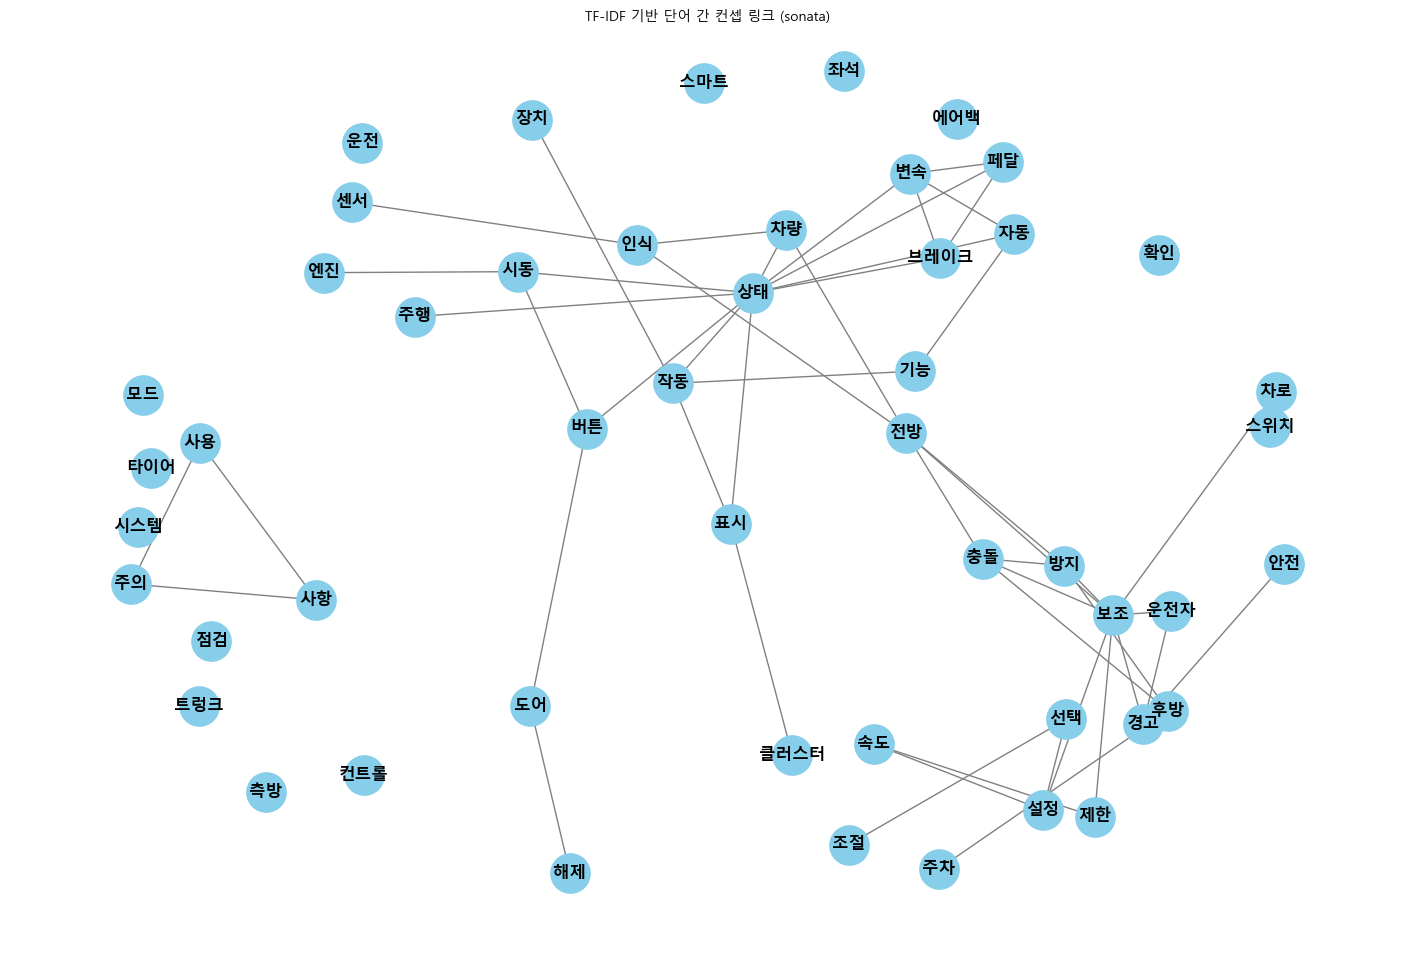

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. sonata_top_50 단어 리스트와 인덱스 추출
sonata_top_words = [word for word, score in sonata_top_50]
sonata_top_indices = [sonata_vectorizer.vocabulary_[word] for word in sonata_top_words]

# 2. 각 단어의 TF-IDF 벡터 추출 (문서 수 만큼 있는 벡터를 단어별로 전치)
sonata_word_vectors = sonata_X[:, sonata_top_indices].T.toarray()  # shape: (50, num_docs)

# 3. 단어 간 코사인 유사도 계산
sonata_similarity_matrix = cosine_similarity(sonata_word_vectors)

# 4. 네트워크 그래프 생성
sonata_G = nx.Graph()

# 노드 추가
for word in sonata_top_words:
    sonata_G.add_node(word)

# 엣지 추가 (유사도 임계값 이상일 때만)
sonata_threshold = 0.4  # 유사도 기준 (필요에 따라 조절 가능)
for i in range(len(sonata_top_words)):
    for j in range(i + 1, len(sonata_top_words)):
        sim = sonata_similarity_matrix[i][j]
        if sim >= sonata_threshold:
            sonata_G.add_edge(sonata_top_words[i], sonata_top_words[j], weight=sim)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 말굽 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 시각화
plt.figure(figsize=(18, 12))
sonata_pos = nx.spring_layout(sonata_G, k=0.5, seed=42)
nx.draw_networkx_nodes(sonata_G, sonata_pos, node_color='skyblue', node_size=800)

# ✅ 한글 폰트 설정: font_family에 폰트 이름 넣기
nx.draw_networkx_labels(
    sonata_G, sonata_pos,
    font_size=12,
    font_weight='bold',
    font_family=font_prop.get_name()
)

nx.draw_networkx_edges(sonata_G, sonata_pos, edge_color='gray')

# 제목에도 폰트 적용하고 싶다면:
plt.title("TF-IDF 기반 단어 간 컨셉 링크 (sonata)", fontsize=50, fontproperties=font_prop)
plt.axis('off')
plt.show()


## 청크 오류 확인

In [10]:
# 조사로 끝나는 text 청크 확인
import re

def is_cut_off(text):
    return bool(re.search(r'(는|가|을|를|에|으로|에게|와|과)$', text.strip()))

sonata['cut_off'] = sonata['text'].apply(is_cut_off)
sonata_cut = sonata[sonata['cut_off']]
print(sonata_cut[['text']])

Empty DataFrame
Columns: [text]
Index: []


In [11]:
# 특수기호로 시작하는 청크 확인
# '-', '*', ',', '.' 로 시작하는 텍스트 필터링
special_start = sonata[sonata['text'].str.match(r'^[-\*,\.]')]

# 결과 확인
print(special_start[['text']])


Empty DataFrame
Columns: [text]
Index: []


In [12]:
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm

# tqdm 적용
tqdm.pandas()

# 1. KoGPT 불러오기
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2")
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")
model.eval()

# 2. Perplexity 계산 함수
def get_perplexity(text):
    try:
        if len(text) < 100:  # 100자 미만은 계산 안 함
            return np.nan
        encodings = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        input_ids = encodings.input_ids
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
            loss = outputs.loss
        return np.exp(loss.item())
    except:
        return np.nan

# 3. 전체 텍스트에 대해 perplexity 계산 (100자 이상만)
sonata['perplexity'] = sonata['text'].progress_apply(get_perplexity)

# 4. Perplexity 기준 상위 10개 출력 (문제가 의심되는 문장)
problematic_texts = sonata.sort_values(by='perplexity', ascending=False).head(10)
print(problematic_texts[['text', 'perplexity']])


c:\Users\jeongbin\Projects\hyundai_reg_bot\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
100%|██████████| 479/479 [09:22<00:00,  1.17s/it]

                                                  text  perplexity
7    명 칭 으 로 찾 을 때\n색 인 (명 칭 ) 목 차 를  활 용 하 세 요 .\n...  575.348360
8    제 작 결 함 안 내\n주  소 : 서 울 특 별 시  서 초 구  헌 릉 로  1...  434.609165
292  운전자 보조 알아두기\n인포테인먼트 소프트웨어 업데이트로 인해 운\n전자 보조 시스...  216.629932
13   (제30조 의3제1항 관 련)\n달  등 의  작 동  여 부 )를  저 장 하 고...  216.604213
156  5\n중고차 구입/디지털 키 관련 차량\n정비\n- 스마트폰  이용  시  제조사별...  173.493699
75   주위 안전 확인\n• 도어를 열기 전 주위를 확인하고 탑승자에게\n도 이를 환기시키...  164.966427
67   금지\n(cid:1155)(cid:1162)\n• 가연성 물질을 싣지 마십시오.\n...  162.468346
88   선 사용 금지\n사이드 에어백 장착 차량의 경우, 시트 커버를\n교체하거나  비닐 ...  157.915092
73   주행 중 엔진 정지 금지\n주행 중에는 시동을 끄지 마십시오.\n브레이크의 성능이 ...  154.698294
429  일\n• 따뜻한 계절에는 일반 수돗물이나 시판되는\n와셔액을 사용해도 되나, 겨울에...  143.236497


In [3]:
a=[7,8,292,13,156,75,67,88,73,429]
for i in (a):
    print(sonata.loc[i,'text'])
    print('='*50)

명 칭 으 로 찾 을 때
색 인 (명 칭 ) 목 차 를  활 용 하 세 요 .
DN8_KO.book  Page 3
자 동 차 제 작 자  등 (부 품 제 작 자  등 ): 현 대 자 동 차 (주 )
제 작 결 함 안 내
주  소 : 서 울 특 별 시  서 초 구  헌 릉 로  12(양 재 동 )
연 락 처 : 080-600-6000
귀 하 의  자 동 차  또 는  자 동 차 부 품 에  잦 은  고 장  등 의  문 제
운전자 보조 알아두기
인포테인먼트 소프트웨어 업데이트로 인해 운
전자 보조 시스템의 각 기능의 설명이 취급설명
서와 다를 수 있습니다. 이 경우 인포테인먼트
시스템 간편 설명서에 있는 QR코드로 웹 매뉴
얼에 접속하여 확인하십시오.
(제30조 의3제1항 관 련)
달  등 의  작 동  여 부 )를  저 장 하 고 , 저 장 된  정 보 를  확 인 할
수  있 는  기 능 을  하 는  장 치 를  말 합 니 다 .
사 고 기 록 정 보 는  사 고  상 황 을  좀  더  잘  이 해 하 는 데  도 움
이  됩 니 다 .
DN8_KO.book  Page 4
DN8_KO.book  Page i
5
중고차 구입/디지털 키 관련 차량
정비
- 스마트폰  이용  시  제조사별  기본  설정값
및 앱 실행 우선순위 정책에 따라 디지털
키 앱 기능 수행이 제한 받을 경우
중고차 구입 시
• 무선 통신을 사용하는 커버 또는 금속 물질
을 사용한 커버 등을 스마트폰에 장착할 경
우 디지털 키 NFC 기능에 장애가 있을 수 있
습니다. 디지털 키 작동에 문제가 있는 경우
스마트폰 커버를 제거하고 사용하십시오.
주위 안전 확인
• 도어를 열기 전 주위를 확인하고 탑승자에게
도 이를 환기시키십시오.
• 차를 후진할 때는 미러 또는 모니터에만 의
존하지 말고 직접 뒤를 확인하십시오.
차 안에서 휴대 전화를 사용하면 인포테인먼트
시스템에서 잡음이 발생할 수 있지만 이는 고장
이 아닙니다. 이 경우 휴대 전화를 인포테인먼
트 시스템에서 되도록 멀리 떨어뜨려 사용하

# 인덱스 13번 다 뛰어쓰기 처리 되어 있음.

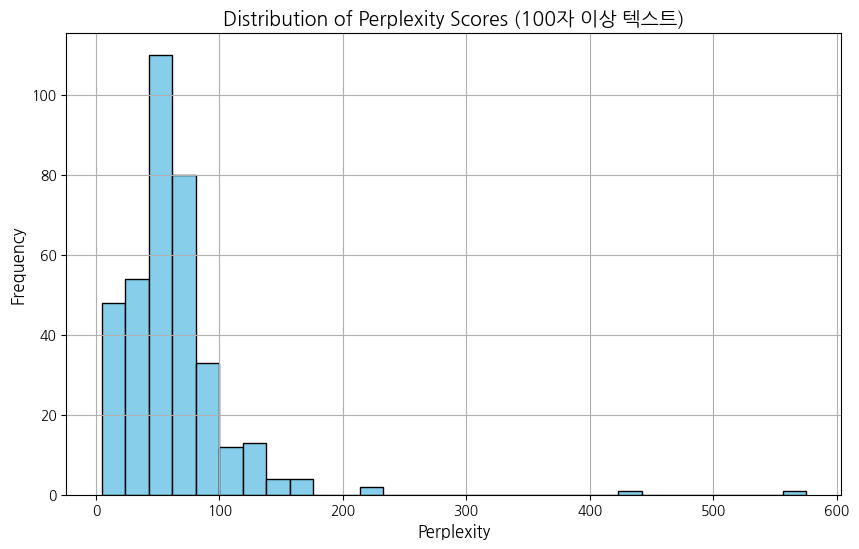

In [13]:
import matplotlib.pyplot as plt

# NaN 제거
valid_perplexities = sonata['perplexity'].dropna()

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(valid_perplexities, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Perplexity Scores (100자 이상 텍스트)', fontsize=14)
plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()
